<a href="https://colab.research.google.com/github/commetra/project-1/blob/main/karmanovskii_i_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Ирина! Мы уже встречались на предыдущем проекте, но представлюсь повторно:  меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Привет, Дмитрий! Рада, что мы снова вместе работаем над проектом. Спасибо огромное за комментарии и ссылки, всё поправила.

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Привет! 🤝</div>

In [1]:
!wget -q https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
!unzip -q dsplus_integrated_project_4.zip

replace to_upload/test_images.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, этот скрипт очень помогает быстро загрузить датасет на виртуальную машину, с которой мы работаем из Colab</div>

## Библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import spacy
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import tensorflow as tf
import re

from torchvision import models
from PIL import Image


from keras.preprocessing import image
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer

from random import randrange

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


DATA_PATH = '/content/to_upload/'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.</div>

## Загрузка

В файле **train_dataset.csv** собрана информация, необходимая для обучения:
- имя файла изображения,
- идентификатор описания и текст описания, для одной картинки может быть доступно до 5 описаний.
- идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.

In [3]:
train_dataset = pd.read_csv(DATA_PATH +'train_dataset.csv')
train_dataset.head(2)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [5]:
train_dataset.duplicated().sum()

0

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Пропусков нет.

В переменную images_df сохраним уникальные имена файлов изображений.

In [6]:
images_df = pd.DataFrame(train_dataset['image']).drop_duplicates('image').reset_index(drop=True)
len(images_df['image'])

1000

В переменную queries_df - уникальные id и тексты запросов.

In [7]:
queries_df = train_dataset[['query_id', 'query_text']].drop_duplicates().reset_index(drop=True)
len(queries_df)

977

Лемманизируем их.

In [8]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [9]:
def lemmatize_text(df):
    df['lem_query_text'] = df['query_text'].apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))
    return df

In [10]:
queries_df = lemmatize_text(queries_df)

In [11]:
queries_df.head(1)

,query_id,query_text,lem_query_text
0,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...


В файле **ExpertAnnotations.tsv** содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов.

Колоноки:
- image - Имя файла изображения.
- query_id - Идентификатор описания.
- exp_1, exp_2, exp_3 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4:
- 1 — изображение и запрос совершенно не соответствуют друг другу,
- 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует,
- 3 — запрос и текст соответствуют с точностью до некоторых деталей,
- 4 — запрос и текст соответствуют полностью.

In [12]:
expert_annotations = pd.read_csv(DATA_PATH + 'ExpertAnnotations.tsv', sep='\t', header=None)
expert_annotations.columns = ['image', 'query_id', 'exp_1', 'exp_2', 'exp_3']
expert_annotations.head(2)

,image,query_id,exp_1,exp_2,exp_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2


In [13]:
expert_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   exp_1     5822 non-null   int64 
 3   exp_2     5822 non-null   int64 
 4   exp_3     5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

В файле **CrowdAnnotations.tsv** — данные по соответствию изображения и описания, полученные с помощью краудсорсинга.

Колоноки:
- image - имя файла изображения;
- query_id - идентификатор описания;
- conf_rate - доля людей, подтвердивших, что описание соответствует изображению;
- confirm - количество человек, подтвердивших, что описание соответствует изображению;
- not_confirm - количество человек, подтвердивших, что описание не соответствует изображению.

In [14]:
crowd_annotations = pd.read_csv(DATA_PATH + 'CrowdAnnotations.tsv', sep='\t', header=None)
crowd_annotations.columns = ['image', 'query_id', 'conf_rate', 'confirm', 'not_confirm']
crowd_annotations.head(2)

,image,query_id,conf_rate,confirm,not_confirm
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3


In [15]:
crowd_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        47830 non-null  object 
 1   query_id     47830 non-null  object 
 2   conf_rate    47830 non-null  float64
 3   confirm      47830 non-null  int64  
 4   not_confirm  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


Пропусков нет.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

В файле **test_queries.csv** находится информация, необходимая для тестирования:
- идентификатор запроса, текст запроса и релевантное изображение;
- для одной картинки может быть доступно до 5 описаний;
- идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.

In [16]:
test_queries = pd.read_csv(DATA_PATH + 'test_queries.csv', sep='|', index_col=[0])
test_queries.head(2)

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg


In [17]:
test_queries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


Пропусков нет.

In [18]:
test_queries.duplicated().sum()

0

В папке **test_images** содержатся изображения для тестирования модели.

In [19]:
test_images = pd.read_csv(DATA_PATH + 'test_images.csv')
test_images.head(2)

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg


In [20]:
test_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Исследовательский анализ данных

### Анализ экспертных и краудсорсинговых оценок

#### Анализ экспертных оценок

Поскольку у нас есть несколько экспертов, их оценки могут варьироваться. Используя медиану, можно получить более надежное представление о том, какова "центральная" оценка в этой группе экспертов. Это полезно, так как есть вероятность разногласий между экспертами.

In [21]:
expert_annotations.shape

(5822, 5)

Всего 5822 экспертных оценок.

In [22]:
# Вычисление медианы
expert_annotations['exp_median'] = (expert_annotations[['exp_1', 'exp_2', 'exp_3']]).median(axis=1)

Приведем полученные значение центральной оценки к диапазону от 0 до 1.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

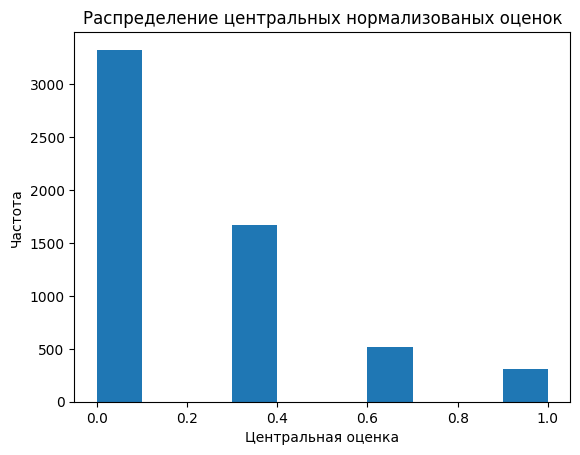

In [23]:
expert_annotations['exp_norm'] = (expert_annotations['exp_median'] - expert_annotations['exp_median'].min()) / (expert_annotations['exp_median'].max() - expert_annotations['exp_median'].min())

# Гистограмма
expert_annotations['exp_norm'].plot.hist()
plt.title('Распределение центральных нормализованых оценок')
plt.xlabel('Центральная оценка')
plt.ylabel('Частота')
plt.show();

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Центральная оценка у большенства экспертов склоняется к тому, что текст соответствует картинке.


In [24]:
expert_annotations.describe()

,exp_1,exp_2,exp_3,exp_median,exp_norm
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999,1.624356,0.208119
std,0.787084,0.856222,0.904087,0.856222,0.285407
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,0.333333
max,4.000000,4.000000,4.000000,4.000000,1.000000


#### Анализ краудсорсинговых оценок

In [25]:
crowd_annotations.shape

(47830, 5)

Всего 47830 краудсорсинговых оценок.

In [26]:
crowd_annotations.describe()

,conf_rate,confirm,not_confirm
count,47830.000000,47830.000000,47830.000000
mean,0.068786,0.208488,2.820155
std,0.207532,0.628898,0.656676
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,3.000000
75%,0.000000,0.000000,3.000000
max,1.000000,5.000000,6.000000


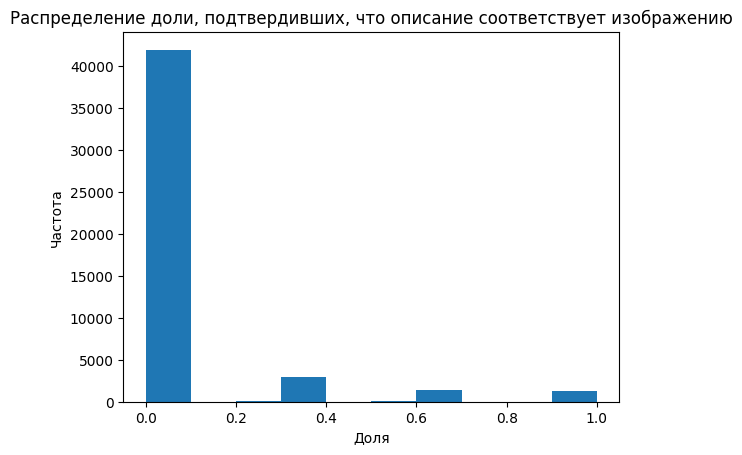

In [27]:
# Гистограмма
crowd_annotations['conf_rate'].plot.hist()
plt.title('Распределение доли, подтвердивших, что описание соответствует изображению')
plt.xlabel('Доля')
plt.ylabel('Частота')
plt.show();

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Распределение доли людей, подтвердивших, что описание соответствует изображению (conf_rate) показвает что большенство не потвердило соотвествие. Такой дисбаланс оценок окажет негативное влияние на обучение модели.

Вывод: для дальнейшей работы над созданием модели лучше использовать датасет с экспертными оценками.

Объеденим экспертные оценки и тренировочный датафреймы.

In [28]:
train_data = train_dataset\
.merge(expert_annotations[['image', 'query_id', 'exp_norm']], how='left', on=['image', 'query_id'])
train_data.head(2)

,image,query_id,query_text,exp_norm
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5822 non-null   object 
 1   query_id    5822 non-null   object 
 2   query_text  5822 non-null   object 
 3   exp_norm    5822 non-null   float64
dtypes: float64(1), object(3)
memory usage: 182.1+ KB


Пропусков нет.

In [30]:
train_data.duplicated().sum()

0

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, этап предобработки проведен корректно, получен итоговый датфрейм признаки (пары изображение + описание) и таргет (агрегированная экспертная оценка). Можем продолжать с ним работать.</div>

Дублиатов нет.

## Проверка данных

Удалим все изображения, которые нарушают закон из обучающей выборки.

In [31]:
# Список запрещённых слов для проверки
ban_wordlist = ['girl', 'girls', 'boy', 'boys', 'child', 'children',
                'baby', 'babies', 'young', 'teen', 'teenager', 'kid',
                'kids', 'toddler', 'toddlers', 'minor', 'youth',
                'junior', 'infant', 'infants'
                ]

In [32]:
# Функция проверки запрещённых слов
def delete_ban_words(string, ban_wordlist):
    # Разделение строки
    lst = string.split()  # Если string не строка, это может вызвать ошибку

    # Проверка на наличие запрещённых слов:
    if set(lst).intersection(ban_wordlist):
        return np.nan # если такие слова есть
    else:
        return string # саму строку, если запрещённых слов нет


In [33]:
# Функция проверки содержит ли входная строка хотя бы одно из запрещённых слов
def find_ban_text(string, ban_wordlist):
    # Проверка наличия запрещённых слов
    if any(word in ban_wordlist for word in string.split()):
        return string
    else:
        return np.nan

Найдём все комментарии (или строки) из колонки 'query_text' train_dataset, которые содержат одно или несколько запрещённых слов из списка ban_wordlist

In [34]:
ban_comments = train_data['query_text'].apply(lambda x: find_ban_text(x, ban_wordlist)).dropna()
ban_comments

,query_text
0,A young child is wearing blue goggles and sitt...
1,A young child is wearing blue goggles and sitt...
2,A young child is wearing blue goggles and sitt...
3,A young child is wearing blue goggles and sitt...
4,A young child is wearing blue goggles and sitt...
...,...
5802,A girl wearing a swimsuit top wears a sign to ...
5803,A young girl balances on wooden pylons at the ...
5804,A young girl balances on wooden pylons at the ...
5814,a woman holding a small ball chasing after a s...


Найдено 1564 строки с запрещёнными словами.

In [35]:
# Оставим только строки с запрещенными комментариями
train_data_ban = train_data[train_data['query_text'].isin(ban_comments)]

# Убираем последние 2 символа из query_id
train_data_ban['query_id'] = train_data_ban['query_id'].map(lambda x: str(x)[:-2])

# Cписок запрещенных картинок, которые нужно удалить
ban_images = train_data_ban['query_id'].unique()

# Убираем из датафрейма все запрещенные изображения
train_data_clear = train_data[train_data['image'].isin(ban_images) == False]

train_data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 5820
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       4091 non-null   object 
 1   query_id    4091 non-null   object 
 2   query_text  4091 non-null   object 
 3   exp_norm    4091 non-null   float64
dtypes: float64(1), object(3)
memory usage: 159.8+ KB


<ipython-input-35-bdef13d3c16f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_ban['query_id'] = train_data_ban['query_id'].map(lambda x: str(x)[:-2])


In [36]:
train_data_clear.isna().sum()

,0
image,0
query_id,0
query_text,0
exp_norm,0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Все ОК, для очистки датасета от пар, содержащих фотографий с детьми применет самый оптимальный метод, связанный с устройством наших данных (описание содержит инфомрацию об изображении, для которого было написано) </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Здесь все ОК, векторизация изображений произведена верно. Единственное, что можно было бы улучшить: чтобы изображения не сжимались, можно векторизовать не все изображение, а вначале вырезать квадрат из центра (посмотри как это было сделано в примере на pytorch с теории курса. </div>

In [37]:
train_data_clear.head(1)

,image,query_id,query_text,exp_norm
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0


In [38]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatize_text(df):
    df['lem_text'] = df['query_text'].apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))
    return df

train_lemma = lemmatize_text(train_data_clear)

<ipython-input-38-a6000263e98e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lem_text'] = df['query_text'].apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))


In [39]:
train_lemma.reset_index(drop=True, inplace=True)


In [40]:
train_lemma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091 entries, 0 to 4090
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       4091 non-null   object 
 1   query_id    4091 non-null   object 
 2   query_text  4091 non-null   object 
 3   exp_norm    4091 non-null   float64
 4   lem_text    4091 non-null   object 
dtypes: float64(1), object(4)
memory usage: 159.9+ KB


In [41]:
train_lemma.head(1)

,image,query_id,query_text,exp_norm,lem_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0,a young child be wear blue goggle and sit in a...


Разделим датафрейм на тренировочную и тестовую выборки с использованием GroupShuffleSplit. Этот подход позволяет гарантировать, что одно и то же изображение попадет либо в обучающую, либо в тестовую выборку, а не в обе. Это помогает избежать утечки данных, что особенно критично в задачах машинного обучения, связанных с изображениями и текстами.

In [42]:
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=10101)

In [43]:
train_indices, valid_indices = next(
    gss.split(X=train_lemma.drop(['exp_norm'], axis=1),
              y=train_lemma['exp_norm'], groups=train_lemma['image'])
)

X_train, X_valid, y_train, y_valid = (
    train_lemma.drop('exp_norm', axis=1).loc[train_indices],
    train_lemma.drop('exp_norm', axis=1).loc[valid_indices],
    train_lemma['exp_norm'].loc[train_indices],
    train_lemma['exp_norm'].loc[valid_indices]
)

In [44]:
print(len(X_train['image'].unique()))
print(len(X_valid['image'].unique()))

496
214


## Векторизация изображений

ResNet-18

In [45]:
# загразим модель
resnet = models.resnet18(weights='IMAGENET1K_V1')

# заморозим веса
for param in resnet.parameters():
    param.requires_grad_(False)

# используем все слои, кроме двух последних
modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules)

# переводим модель в режим предсказания
resnet.eval();

In [46]:
# приведем изображение к нужному формату
norm = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
])

Функция img_to_vect предназначена для преобразования изображения в векторное представление с использованием предобученной нейронной сети, такой как ResNet.

In [47]:
def img_to_vect(image_name, img_folder_name):

    img = Image.open(DATA_PATH + img_folder_name + '/' + image_name).convert('RGB')
    image_tensor = preprocess(img).unsqueeze(0)
    img_vector = resnet(image_tensor).flatten().numpy()

    return img_vector

Функция df_img_vectorizer выполняет векторизацию изображений, хранящихся в DataFrame, и добавляет полученные векторы как новый столбец в этот DataFrame.

In [48]:
def df_img_vectorizer(df, img_folder_name):

    df['img_vector'] = df['image'].apply(lambda x: img_to_vect(x, img_folder_name))

    return df

In [49]:
images_df = df_img_vectorizer(images_df, 'train_images')
images_df.head(1)

,image,img_vector
0,1056338697_4f7d7ce270.jpg,"[0.69394046, 3.0318356, 2.9169335, 0.9518981, ..."


Объединим данный датафрейм с обучающей выборкой.

In [50]:
X_train = X_train.merge(images_df, on='image', how='left')
X_train.head(1)

,image,query_id,query_text,lem_text,img_vector
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...,"[0.69394046, 3.0318356, 2.9169335, 0.9518981, ..."


Объединим данный датафрейм с валидационной выборкой.

In [51]:
X_valid = X_valid.merge(images_df, on='image', how='left')
X_valid.head(1)

,image,query_id,query_text,lem_text,img_vector
0,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...,"[2.1992745, 1.6522413, 2.4724615, 0.96829367, ..."


В результате векторизации каждое изображение из папки train_images превращается в одномерный вектор.

## Векторизация текста

Векторизуем тексты с помощью TfidfVectorizer на обучающей выборки.

In [52]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train['lem_text'].drop_duplicates());

In [53]:
def text_to_vect(df):
    text_features_array = tfidf.transform(df['lem_text']).toarray()
    return text_features_array

##Объединение векторов

Функция создаёт массив объединенных векторов изображений и текстов, который можно использовать для обучений моделей.

In [54]:
def make_features(df):

    # массив с векторами признаков изображений
    img_array = np.array(df['img_vector'].values.tolist())

    # массив с векторами признаков текста
    tfidf_array = text_to_vect(df)

    # объединенный массив с полным набором признаков
    features_array = np.concatenate((tfidf_array, img_array), axis=1)

    return features_array

Массив для обучения.

In [55]:
train_features = make_features(X_train)
train_features.shape

(2852, 1682)

In [56]:
train_features

array([[0.        , 0.        , 0.        , ..., 0.08500693, 1.05670047,
        0.09815712],
       [0.        , 0.        , 0.        , ..., 1.00141025, 1.40175307,
        0.68977416],
       [0.        , 0.        , 0.        , ..., 2.81012344, 1.89220369,
        1.87723505],
       ...,
       [0.        , 0.        , 0.        , ..., 2.88470554, 1.02299964,
        0.71294075],
       [0.        , 0.        , 0.        , ..., 0.85825169, 1.57140064,
        0.17738928],
       [0.        , 0.        , 0.        , ..., 0.7615971 , 1.08476496,
        0.18721688]])

Массив для валидации.

In [57]:
valid_features = make_features(X_valid)
valid_features.shape

(1239, 1682)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью BERT    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
В этом разделе у тебя явная ошибка. Смотри,  утебя уже есть датафрейм с 4091 парами изображение/описание.

После векторизации у тебя должны получиться матрицы размером 4091х2048 и 4091х1244.  При их объдинении никакие пропуски возникнуть не должны.
    
Пожалуста еще раз по шагам перепроверь все операции.  Как дополнительный совет - оставайся в матрицах numpy, не нужно повышать уровень абстракции и переходить к датафреймам.  Все методы машинного обучения отлично работают с матрицами (к тому же они лучше оптимизированы под эти задачи), а датафрейм это надстройка, для работы с разными типами данных.    
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправила.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

## Модели для предсказания близости двух векторов

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Если ты внимательно посмотришь на признаки, содержащиеся в train_df, то окажется что там остался признак `exp_norm`,  который нам нужно предсказывать.


Именно поэтому модель дерева решений дает такую невероятно крутую метрику.
</div>

Для сравнения точности различных моделей в задаче регрессии, такой как предсказание оценок экспертов по изображениям и текстовым описаниям, подходящей метрикой будет средняя абсолютная ошибка (MAE - Mean Absolute Error) или среднеквадратичная ошибка (MSE - Mean Squared Error). Эти метрики хорошо работают для задач регрессии и позволяют понять, насколько предсказания модели близки к реальным значениям.

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Исправила.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

Масштабирование признаков.

In [58]:
'''# Создаем экземпляр StandardScaler
scaler = StandardScaler()

# Масштабирование признаков в тренировочных данных
train_df_scaled = scaler.fit_transform(X_train)

# Масштабирование признаков в тестовых данных
valid_df_scaled = scaler.transform(X_valid)

# Если хотите, вы можете превратить обратно в DataFrame
train_df_scaled = pd.DataFrame(train_df_scaled, columns=X_train.columns)
test_df_scaled = pd.DataFrame(valid_df_scaled, columns=X_valid.columns)
'''

'# Создаем экземпляр StandardScaler\nscaler = StandardScaler()\n\n# Масштабирование признаков в тренировочных данных\ntrain_df_scaled = scaler.fit_transform(X_train)\n\n# Масштабирование признаков в тестовых данных\nvalid_df_scaled = scaler.transform(X_valid)\n\n# Если хотите, вы можете превратить обратно в DataFrame\ntrain_df_scaled = pd.DataFrame(train_df_scaled, columns=X_train.columns)\ntest_df_scaled = pd.DataFrame(valid_df_scaled, columns=X_valid.columns)\n'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Обычно перед линейной регрессией я обязательно требую масштабировать признаки, т.к. это может помочь модели лучше сходиться.  И для любого классического проекта (в том числе выпускного) это строгая рекомендаци.
    
Но в нашем проекте это не очень однозначно. Да, с одной стороны модель будет уделать одинаковое влияние обоим признакам, да и учиться будет быстрее.    

Но есть и минусы масштабирования:

 - Нарушение структуры эмбеддингов – смысл и семантические связи в эмбеддингах могут быть изменены.
 - Потеря важности признаков – относительная важность признаков из разных моделей (ResNet и BERT) может быть потеряна.

Рекомендация:

Попробуй оба подхода (с масштабированием и без) и сравни результаты, чтобы выбрать оптимальный вариант.    
    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Добавила.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

### DummyRegressor

In [59]:
# Инициализация DummyRegressor
dummy_regressor = DummyRegressor(strategy="mean")  # Предсказания будут равны среднему

# Обучение модели
dummy_regressor.fit(X_train, y_train)

# Предсказания
dummy_y_pred = dummy_regressor.predict(X_valid)

# Оценка производительности
dummy_mae = mean_absolute_error(y_valid, dummy_y_pred)

print(f"Средняя абсолютная ошибка (MAE): {dummy_mae}")


Средняя абсолютная ошибка (MAE): 0.24744653370417036


Средняя абсолютная ошибка (MAE): 0.2474

### Linear Regression

Без масштабирования.

In [60]:
# Обучение линейной регрессии
linear_model = LinearRegression()
linear_model.fit(train_features, y_train)

# Предсказания и оценка
y_pred_linear = linear_model.predict(valid_features)
mae_linear = mean_absolute_error(y_valid, y_pred_linear)
print(f'MAE для Linear Regression: {mae_linear}')

MAE для Linear Regression: 0.9288435366957916


MAE для Linear Regression: 0.9288

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">

Не стоит в этот проект добавлять кросс-валидацию. Ведь оценку моделей мы делаем по валидационной выборке. А сравнение моделей по разным "базам" (кросс-валидация или валидационая выборка) может привести к некорректным результатам.
    
    
А для нейронок, которые обучаются очень долго и часто требуют ручной настройки применять кросс-валидациию это достаточно "дорого".
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Удалила дерево.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

### Полносвязная нейронная сеть без подбора

In [61]:
# Создание модели нейронной сети
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_absolute_error')
    return model

# Обучение модели
nn_model = create_nn_model(train_features.shape[1])
nn_model.fit(train_features, y_train, epochs=150, batch_size=32, verbose=1)

# Предсказания и оценка
y_pred_nn = nn_model.predict(valid_features)
mae_nn = mean_absolute_error(y_valid, y_pred_nn)
print(f'MAE для Neural Network без подбора: {mae_nn}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2544
Epoch 2/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2326
Epoch 3/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2395
Epoch 4/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2483
Epoch 5/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2224
Epoch 6/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2279
Epoch 7/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2367
Epoch 8/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2337
Epoch 9/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2404
Epoch 10/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2336
Epoch 11/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2472
Epoch 12/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2346
Epoch 13/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2340
Epoch 14/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2383
Epoch 15/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.23

MAE для Neural Network без подбора: 0.2176

### Нейронная сеть с подбором

In [62]:
best_metric = 0.99 #значение начальной метрики должно быть установлено так, чтобы оно превышало все возможные значения MAE, которые вы можете получить.

for i in range(50, 151, 100):
    for j in range(20, 51, 30):
        for k in range(5, 11, 5):

            units_4 = [i, j, k, 1]
            input_dim = train_features.shape[1]

            dense_model = keras.models.Sequential()
            dense_model.add(keras.layers.Dense(units=units_4[0], input_dim=input_dim, activation='relu'))
            dense_model.add(Dense(units=units_4[1], input_dim=units_4[0], activation='relu'))
            dense_model.add(Dense(units=units_4[2], input_dim=units_4[1], activation='relu'))
            dense_model.add(Dense(units=units_4[3], input_dim=units_4[2], activation='sigmoid'))

            dense_model.compile(loss='mean_absolute_error', optimizer='Adam', metrics=['mean_absolute_error'])

            dense_model.fit(train_features, y_train, epochs=100,validation_data=(valid_features, y_valid))

            metric = mean_absolute_error(y_valid, dense_model.predict(valid_features))

            if metric < best_metric:
                best_metric = metric
                best_units = [i, j, k]
                best_dense_model = dense_model

print(f'Лучшие параметры для Neural Network с подбором: {best_units}')
print(f'MAE для Neural Network с подбором: {best_metric}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - val_loss: 0.2193 - val_mean_absolute_error: 0.2193
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - val_loss: 0.2074 - val_mean_absolute_error: 0.2074
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - val_loss: 0.2038 - val_mean_absolute_error: 0.2038
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - val_loss: 0.2011 - val_mean_absolute_error: 0.2011
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - val_loss: 0.1980 - val_mean_absolute_error: 0.1980
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - val_loss: 0.1984 - val_mean_absolute_error: 0.1984
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - val_loss: 0.1949 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3002 - mean_absolute_error: 0.3002 - val_loss: 0.2178 - val_mean_absolute_error: 0.2178
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - val_loss: 0.2142 - val_mean_absolute_error: 0.2142
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - val_loss: 0.2022 - val_mean_absolute_error: 0.2022
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - val_loss: 0.1990 - val_mean_absolute_error: 0.1990
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - val_loss: 0.2002 - val_mean_absolute_error: 0.2002
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - val_loss: 0.1974 - val_mean_absolute_error: 0.1974
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - val_loss: 0.1971 - v

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - val_loss: 0.2081 - val_mean_absolute_error: 0.2081
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - val_loss: 0.1991 - val_mean_absolute_error: 0.1991
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - val_loss: 0.2066 - val_mean_absolute_error: 0.2066
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - val_loss: 0.1972 - val_mean_absolute_error: 0.1972
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - val_loss: 0.1991 - val_mean_absolute_error: 0.1991
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - val_loss: 0.1944 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - val_loss: 0.2175 - val_mean_absolute_error: 0.2175
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - val_loss: 0.2056 - val_mean_absolute_error: 0.2056
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - val_loss: 0.2061 - val_mean_absolute_error: 0.2061
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - val_loss: 0.2015 - val_mean_absolute_error: 0.2015
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - val_loss: 0.1974 - val_mean_absolute_error: 0.1974
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - val_loss: 0.1952 - val_mean_absolute_error: 0.1952
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - val_loss: 0.1963 - v

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - val_loss: 0.2175 - val_mean_absolute_error: 0.2175
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - val_loss: 0.2047 - val_mean_absolute_error: 0.2047
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - val_loss: 0.1997 - val_mean_absolute_error: 0.1997
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - val_loss: 0.1974 - val_mean_absolute_error: 0.1974
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - val_loss: 0.1953 - val_mean_absolute_error: 0.1953
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - val

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2316 - mean_absolute_error: 0.2316 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - val_loss: 0.2176 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - val_loss: 0.2164 - val_mean_absolute_error: 0.2164
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - val_loss: 0.2028 - val_mean_absolute_error: 0.2028
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - val_loss: 0.2068 - val_mean_absolute_error: 0.2068
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - val_loss: 0.2134 - val_mean_absolute_error: 0.2134
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - val_loss: 0.2029 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - val_loss: 0.2175 - val_mean_absolute_error: 0.2175
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - val_loss: 0.2176 - val_mean_absolute_error: 0.2176
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - val_loss: 0.2176 - 

MAE для Neural Network с подбором: 0.1756

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Есть смысл передать модели валидационную выборку, тогда она будет показывать лосс не толко на обучении, но и на валидации. Это помогает нам лучше настроить модель, понимать как улучшить решение. Ну и конечно же мониторить и лосс и нашу целевую метрику МАЕ, как мы это делали в прошлом проекте.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
Но в случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Попробовала подбор для нейронки. Оказывается так можно было! Спасибо за совет!.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
 <b>v2</b>  

Рад, что у тебя получилось улучшить результат, но советую все-таки острожно подходить к таким переборам. Для начала почувствуй, как нужно обучать нейронки, в ручном режиме пробуй добавлять регуляризаци, увеличивать количество нейронов (лучше кратно степени 2: 32-64-128-256...), менять регуляризацию, увеличивать / уменьшать шаг обучения. И учи всегда "до упора", пока снижается метрика на валидации.
    
И только когда появится понимание, как оно работает можно пробовать переборы, но тут я бы лучше смотрел в сторону Optuna, т.к. там используется рациональная оптимизация.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).

 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

- MAE для DummyRegressor: 0.25. Это значение MAE указывает на то, что DummyRegressor (который обычно предсказывает среднее значение целевой переменной) имеет среднюю абсолютную ошибку 0.25. Это означает, что в среднем, предсказание модели отклоняется от фактических значений на 0.25. Так как это простая модель, она служит референсной точкой для оценки производительности более сложных моделей.

- MAE для Linear Regression: 0.93. Значение MAE 0.93 для линейной регрессии означает, что эта модель значительно хуже работает, чем проста модель DummyRegressor. Это может свидетельствовать о том, что линейная регрессия не подходит для предсказания данной задачи, возможно, из-за отсутствия линейной зависимости в данных, наличия выбросов или нерелевантных признаков.

- MAE для Neural Network без подбора: 0.22. Это значение MAE указывает на то, что нейронная сеть значительно лучше, чем DummyRegressor и линейная регрессия. Это может означать, что нейронная сеть смогла уловить более сложные зависимости в данных.
- MAE для Neural Network с подбором: 0.18. Эта модель показала лучший результат.

## Тестирование

Для для тестирования получим эмбеддинги для всех тестовых изображений из папки test_images, выберим случайные 10 запросов из файла test_queries.csv и для каждого запроса выведим наиболее релевантное изображение. Сравним визуально качество поиска.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
На мой взгляд главная ошибка, которую ты допускаешь в этой части - ты переобучаешь TF-IDF векторайзер. Но это не имеет смысла, нужно использовать именно тот векторайзер, который ты обучила при подготовке данных для обучения модели.

Ну и конечно не нужно заранее векторизовать тестовые описания. Это легко сделатьт "на лету" при получении запроса.
    
    
На всякий случай опишу логику для этого раздела
    
Во первых, нужно заранее векторизовать 100 уникальных тестовых изображений.    
    
Далее нужно написать функцию, способную искать изображение по тексту для одного описания. Функция должна уметь работать с любым текстовым описанием.

Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости.
   - Выдавать дисклеймер если запрос некорректный
    
Под капотом функция должна векторизовать полученный текст, и с помощью модели получить предсказание для 100 пар (вектор описания + вектор изображения), где вектор описания мы получили только что, а 100 векторов изображений получили заранее.
    
И дальше ищем изображение, для которого модель покажет максимальную метрику.
        

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Доработала.

</div>

In [63]:
test_images.head(1)

,image
0,3356748019_2251399314.jpg


Векторизуем тестовые изображения.

In [64]:
test_images.shape

(100, 1)

In [65]:
test_queries.shape

(500, 3)

In [66]:
test_images_vectors = df_img_vectorizer(test_images, 'test_images')
test_images_vectors.head(1)

,image,img_vector
0,3356748019_2251399314.jpg,"[0.66924816, 0.004511684, 0.2361333, 0.8828633..."


In [67]:
test_df = test_images_vectors
test_df.head()

,image,img_vector
0,3356748019_2251399314.jpg,"[0.66924816, 0.004511684, 0.2361333, 0.8828633..."
1,2887171449_f54a2b9f39.jpg,"[0.94963413, 3.2524536, 0.6983954, 1.2815484, ..."
2,3089107423_81a24eaf18.jpg,"[1.4175807, 0.97349703, 0.5840187, 0.3300446, ..."
3,1429546659_44cb09cbe2.jpg,"[0.1897867, 1.8764689, 0.82571864, 0.62114877,..."
4,1177994172_10d143cb8d.jpg,"[0.44397026, 2.3347216, 0.0063395523, 2.394032..."


Функция eval_query_nn обрабатывает текстовый запрос, определяет, содержит ли он стоп-слова, и в зависимости от этого либо выводит предсказанные изображения и оценку, либо отображает дисклеймер.

In [68]:
def eval_query_nn(query_text):
    # лемматизируем текст запроса
    lemm_text = " ".join([token.lemma_ for token in nlp(query_text)])
    # создаем маркер наличия стоп-слова
    stop = 0
    # проверяем на наличие стоп-слов в запросе
    stop_words = ban_wordlist
    for word in stop_words:
        if word in lemm_text:
            stop = 1
            break

    if stop == 0:
        # лемматизируем текст
        test_df['lem_text'] = lemm_text
        # создаем массив признаков
        test_features = make_features(test_df)
        # получаем предсказания
        test_preds = best_dense_model.predict(test_features)

        # находим индекс изображения с наибольшей оценкой
        img_index = np.argsort(test_preds.ravel())[::-1][0]

        # выводим изображение на экран
        display(Image.open(DATA_PATH + 'test_images/' +
                           test_images.loc[img_index,'image']).convert('RGB'))

        # выодим текст запроса на экран
        print(query_text)
        # выводим оценку, которую поставила модель, на экран
        print(round(test_preds.ravel()[img_index], 3))

    else:
        # если в запросе есть стоп-слова - выводим дисклеймер
        result = print('This image is unavailable in your country in compliance with local laws.')

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Тут наверное сказывается отсутствие навыков отладки. Скажу как я поступаю в таких ситуациях: если ошибка внутри функции, то "вытаскивай все её кишки наружу" и по строчкам смотри, что получается на каждом шаге.
    
Причина ошибки в следующем:
    
 test_features содержит 500 записей (хотя у тебя всего 100 уникальных изображений), соответвенно частенько у тебя появляются индексы больше 100
    
 но индекс ты передаешь в датафрейм test_images, где всего 100 изображений, отсюда и ошибка
    
Советую работать только со 100 уникальными изображениями, тогда test_features будет размером всего 100 и ошибки с индексами не возникнет   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Спасибо большое за помощь, заработало.

</div>

## Демонстрация

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
<b>v2</b>    
Тут наверное сказывается отсутствие навыков отладки. Скажу как я поступаю в таких ситуациях: если ошибка внутри функции, то "вытаскивай все её кишки наружу" и по строчкам смотри, что получается на каждом шаге.
    
Причина ошибки в следующем:
    
 test_features содержит 500 записей (хотя у тебя всего 100 уникальных изображений), соответвенно частенько у тебя появляются индексы больше 100
    
 но индекс ты передаешь в датафрейм test_images, где всего 100 изображений, отсюда и ошибка
    
Советую работать только со 100 уникальными изображениями, тогда test_features будет размером всего 100 и ошибки с индексами не возникнет   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Поправила, заработало.

</div>

Проверим, ограничивает ли функция запрещенный контент.

In [69]:
query_text = 'A family watches as a little girl blows'
print(eval_query_nn(query_text))

This image is unavailable in your country in compliance with local laws.
None


Запрещенный контент не выводится на экран. Введём произвольные запросы и оценим результат.

In [70]:
query_text = test_queries['query_text'][3]
eval_query_nn(query_text)

This image is unavailable in your country in compliance with local laws.


Этот запрос содержал запрещенный компонент.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


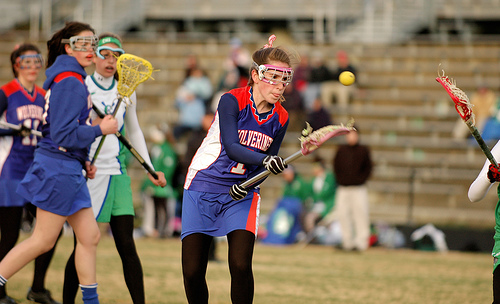

Several female lacrosse players are going after a ball .
0.599
None


In [71]:
query_text = 'Several female lacrosse players are going after a ball .'
print(eval_query_nn(query_text))

Запрос соответсвует изображению.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


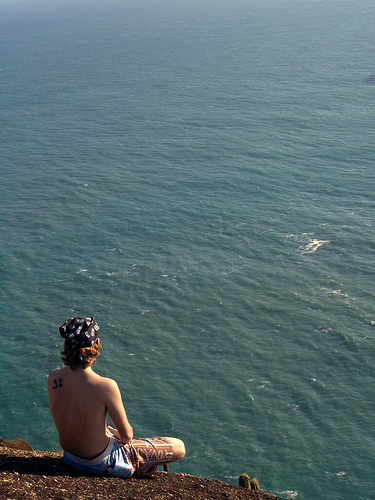

Woman in white bikini top and blue shorts with body of water in the background .
0.585


In [72]:
query_text = test_queries['query_text'][44]
eval_query_nn(query_text)

Запрос не соответсвует изображению.

In [73]:
query_text = test_queries['query_text'][62]
eval_query_nn(query_text)

This image is unavailable in your country in compliance with local laws.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


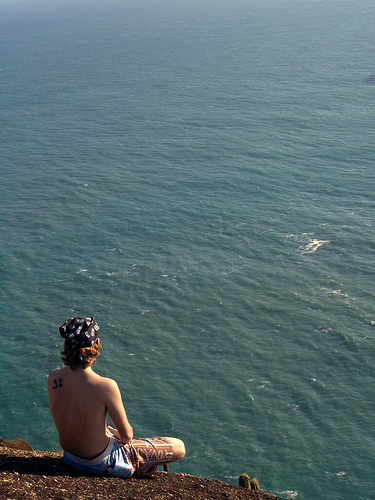

A group of people in a large yard toss a disc .
0.646


In [74]:
query_text = test_queries['query_text'][67]
eval_query_nn(query_text)

Запрос не соответсвует изображению.

In [75]:
query_text = test_queries['query_text'][4]
eval_query_nn(query_text)

This image is unavailable in your country in compliance with local laws.


In [76]:
query_text = test_queries['query_text'][55]
eval_query_nn(query_text)

This image is unavailable in your country in compliance with local laws.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


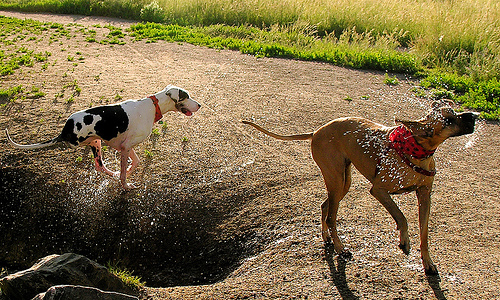

The brown dog is wearing a black collar .
0.667


In [77]:
query_text = test_queries['query_text'][39]
eval_query_nn(query_text)

Запрос почти соответсвует изображению.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


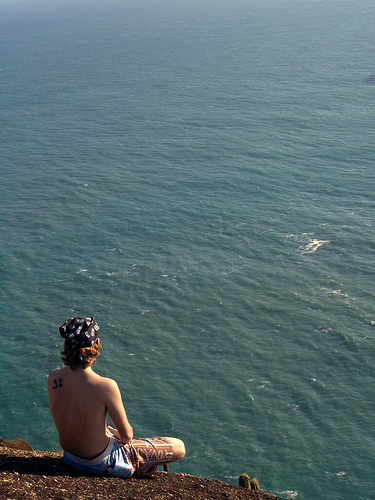

Women play lacrosse .
0.681


In [78]:
query_text = test_queries['query_text'][14]
eval_query_nn(query_text)

Запрос не соответсвует изображению.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


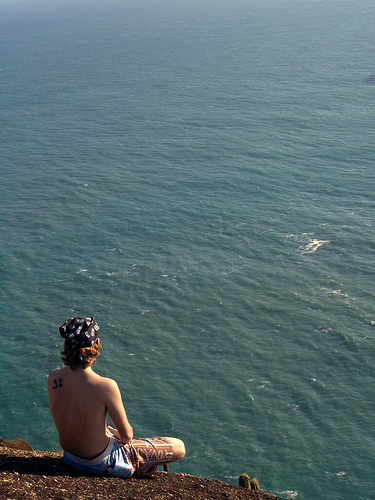

Grey horse wearing blue cover eating from a orange bucket held by a person in a green shirt .
0.649


In [79]:
query_text = test_queries['query_text'][34]
eval_query_nn(query_text)

Запрос не соответсвует изображению.

##Общий вывод

В рамках проекта была разработана демонстрационная версия поиска изображений по запросу.

Для демонстрационной версии были обучены модели, которая получали векторное представление изображения, векторное представление текста, а на выходе выдавали число от 0 до 1, которое показывает, насколько текст и картинка подходят друг другу.

Результаты:
- Лучше всего, с задачей сравнения сходства картинки и текста, справляется нейроная модель полученная с помощью подбора параметров. Метрика MAE составляет 0.1763.
- К сожалению модель допускает ошибки во время поиска картинки по её текстовому описанию, запросы часто не соотвествуют изображениям. Требуется более точная настройка работы нейросети или изменение её архитектуры.
- Рекомендуется рассмотреть другие инструменты для векторизации текста (например BERT).
- Проект по созданию сервиса поиска фотографий по текстовому описанию практически осуществим, но требует тщательного подбора параметров нейросети и обширного сбалансированого обучающего материала максимально точно размеченного экспертами.


<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Спасибо за идеи, всё обязательно попробую в своих проектах.

</div>